<a href="https://colab.research.google.com/github/kaustav1996/utility_data_analysis/blob/master/analyze_csv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Load data from git repository :

In [62]:
repo_url = 'https://github.com/kaustav1996/utility_data_analysis'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

%ls

csv_file= os.path.abspath(os.path.join(repo_dir_path,'interval_data.csv'))


/content
fatal: destination path 'utility_data_analysis' already exists and is not an empty directory.
/content/utility_data_analysis
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/kaustav1996/utility_data_analysis
   569167e..4948256  master     -> origin/master
Updating 569167e..4948256
Fast-forward
 interval_data.csv | 32730 ++++++++++++++++++++++++++--------------------------
 1 file changed, 16365 insertions(+), 16365 deletions(-)
analyse_csv_data.ipynb  interval_data.csv  LICENSE  README.md


Load data from CSV.

In [78]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
data = pd.read_csv(csv_file, parse_dates=['TIME'], index_col='TIME',date_parser=dateparse)
print ( data.head())
data.index

                       KW
TIME                     
2018-08-29 00:15:00  0.64
2018-08-29 00:30:00  0.74
2018-08-29 00:45:00  1.10
2018-08-29 01:00:00  0.92
2018-08-29 01:15:00  0.92


DatetimeIndex(['2018-08-29 00:15:00', '2018-08-29 00:30:00',
               '2018-08-29 00:45:00', '2018-08-29 01:00:00',
               '2018-08-29 01:15:00', '2018-08-29 01:30:00',
               '2018-08-29 01:45:00', '2018-08-29 02:00:00',
               '2018-08-29 02:15:00', '2018-08-29 02:30:00',
               ...
               '2019-05-29 19:45:00', '2019-05-29 20:00:00',
               '2019-05-29 20:15:00', '2019-05-29 20:30:00',
               '2019-05-29 20:45:00', '2019-05-29 21:00:00',
               '2019-05-29 21:15:00', '2019-05-29 21:30:00',
               '2019-05-29 21:45:00', '2019-05-29 22:00:00'],
              dtype='datetime64[ns]', name='TIME', length=16400, freq=None)

In [110]:
ts = data['KW'] 
ts['2019-01-01']

TIME
2019-01-01 01:30:00    0.86
2019-01-01 00:15:00    1.72
2019-01-01 00:30:00    3.43
2019-01-01 00:45:00    1.72
2019-01-01 01:00:00    3.43
2019-01-01 01:15:00    3.00
2019-01-01 01:45:00    1.29
2019-01-01 02:00:00    2.15
2019-01-01 05:00:00    2.58
2019-01-01 04:15:00    2.15
2019-01-01 04:30:00    1.72
2019-01-01 04:45:00    0.43
2019-01-01 05:15:00    3.00
2019-01-01 05:30:00    1.29
2019-01-01 05:45:00    2.15
2019-01-01 06:00:00    3.00
2019-01-01 07:00:00    2.15
2019-01-01 06:15:00    1.72
2019-01-01 06:30:00    1.29
2019-01-01 06:45:00    1.29
2019-01-01 07:15:00    0.43
2019-01-01 07:30:00    2.15
2019-01-01 07:45:00    2.58
2019-01-01 08:00:00    0.86
2019-01-01 10:15:00    3.00
2019-01-01 10:30:00    2.58
2019-01-01 10:45:00    2.58
2019-01-01 11:00:00    0.43
2019-01-01 11:15:00    0.43
2019-01-01 11:30:00    3.43
2019-01-01 11:45:00    2.15
2019-01-01 12:00:00    1.29
2019-01-01 18:15:00    2.15
2019-01-01 18:30:00    3.00
2019-01-01 18:45:00    3.00
2019-01-01 19:4

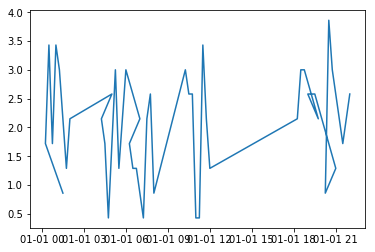

In [109]:
plt.plot(ts['2019-01-01'])